# Test Results

These are the results for the IONOSPHERE dataset. The dataset has 34 attributes, and we set a goal of 24 attributes. These tests were limited to 5 minutes.

In [20]:
import math
n = 34
k = 24
print("There are total:", sum(math.comb(n,i) for i in range(k,n+1)), "infeasible solutions")
print("There are total:", math.comb(n,k), "feasible solutions")

There are total: 208791332 infeasible solutions
There are total: 131128140 feasible solutions


## Testing different solvers

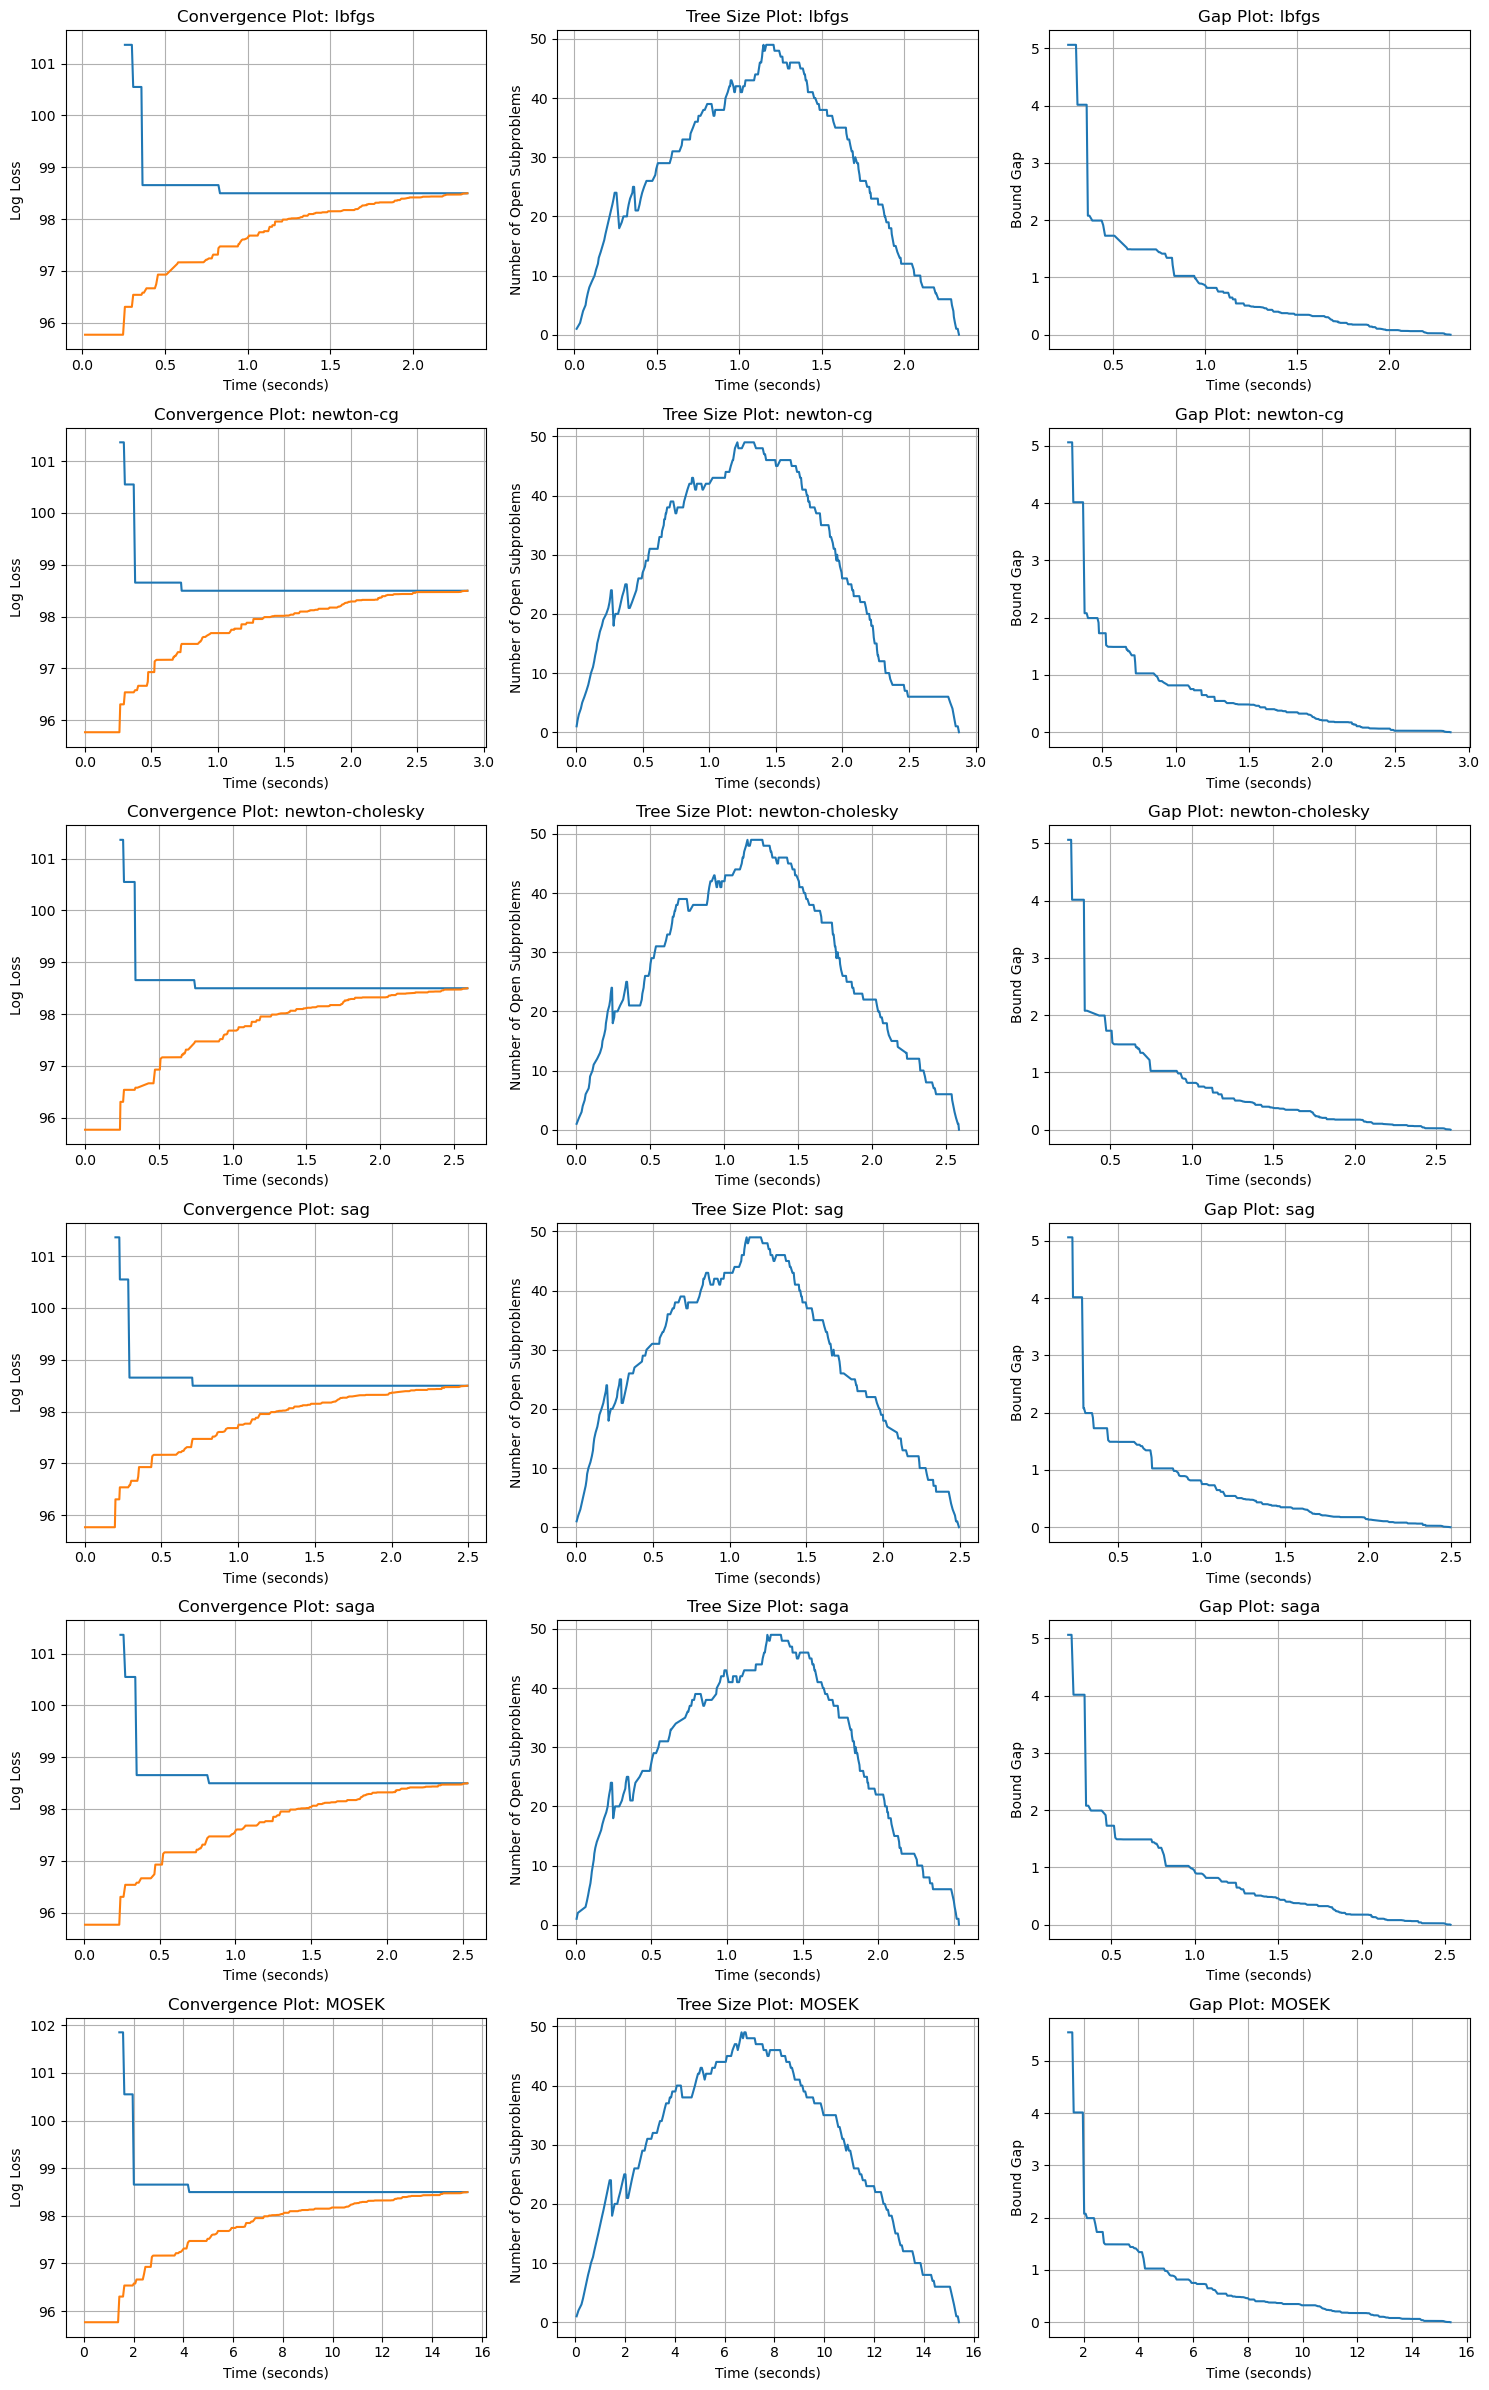

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

solvers = ("lbfgs", "newton-cg", "newton-cholesky", "sag", "saga", "MOSEK")

fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 24))

for i, solver in enumerate(solvers):
    ax1 = axes[i, 0]
    ax2 = axes[i, 1]
    ax3 = axes[i,2]


    df = pd.read_csv(f"test_data/test_ionosphere_{solver}_leastFractional_None_24.csv")

    # Plot 1
    ax1.plot(df['time'], df['UB'], label='Upper Bound')
    ax1.plot(df['time'], df['LB'], label='Lower Bound')
    ax1.set_title(f'Convergence Plot: {solver}')
    ax1.set_xlabel('Time (seconds)')
    ax1.set_ylabel('Log Loss')
    ax1.grid(True)

    # Plot 2
    ax2.plot(df['time'], df['num_subproblems'])#, label='Number of Open Subproblems')
    ax2.set_title(f'Tree Size Plot: {solver}')
    ax2.set_xlabel('Time (seconds)')
    ax2.set_ylabel('Number of Open Subproblems')
    ax2.grid(True)

    # Plot 3
    ax3.plot(df['time'], df['UB'] - df['LB'], label='Gap')
    ax3.set_title(f'Gap Plot: {solver}')
    ax3.set_xlabel('Time (seconds)')
    ax3.set_ylabel('Bound Gap')
    ax3.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


## Testing Initial UB Heuristics

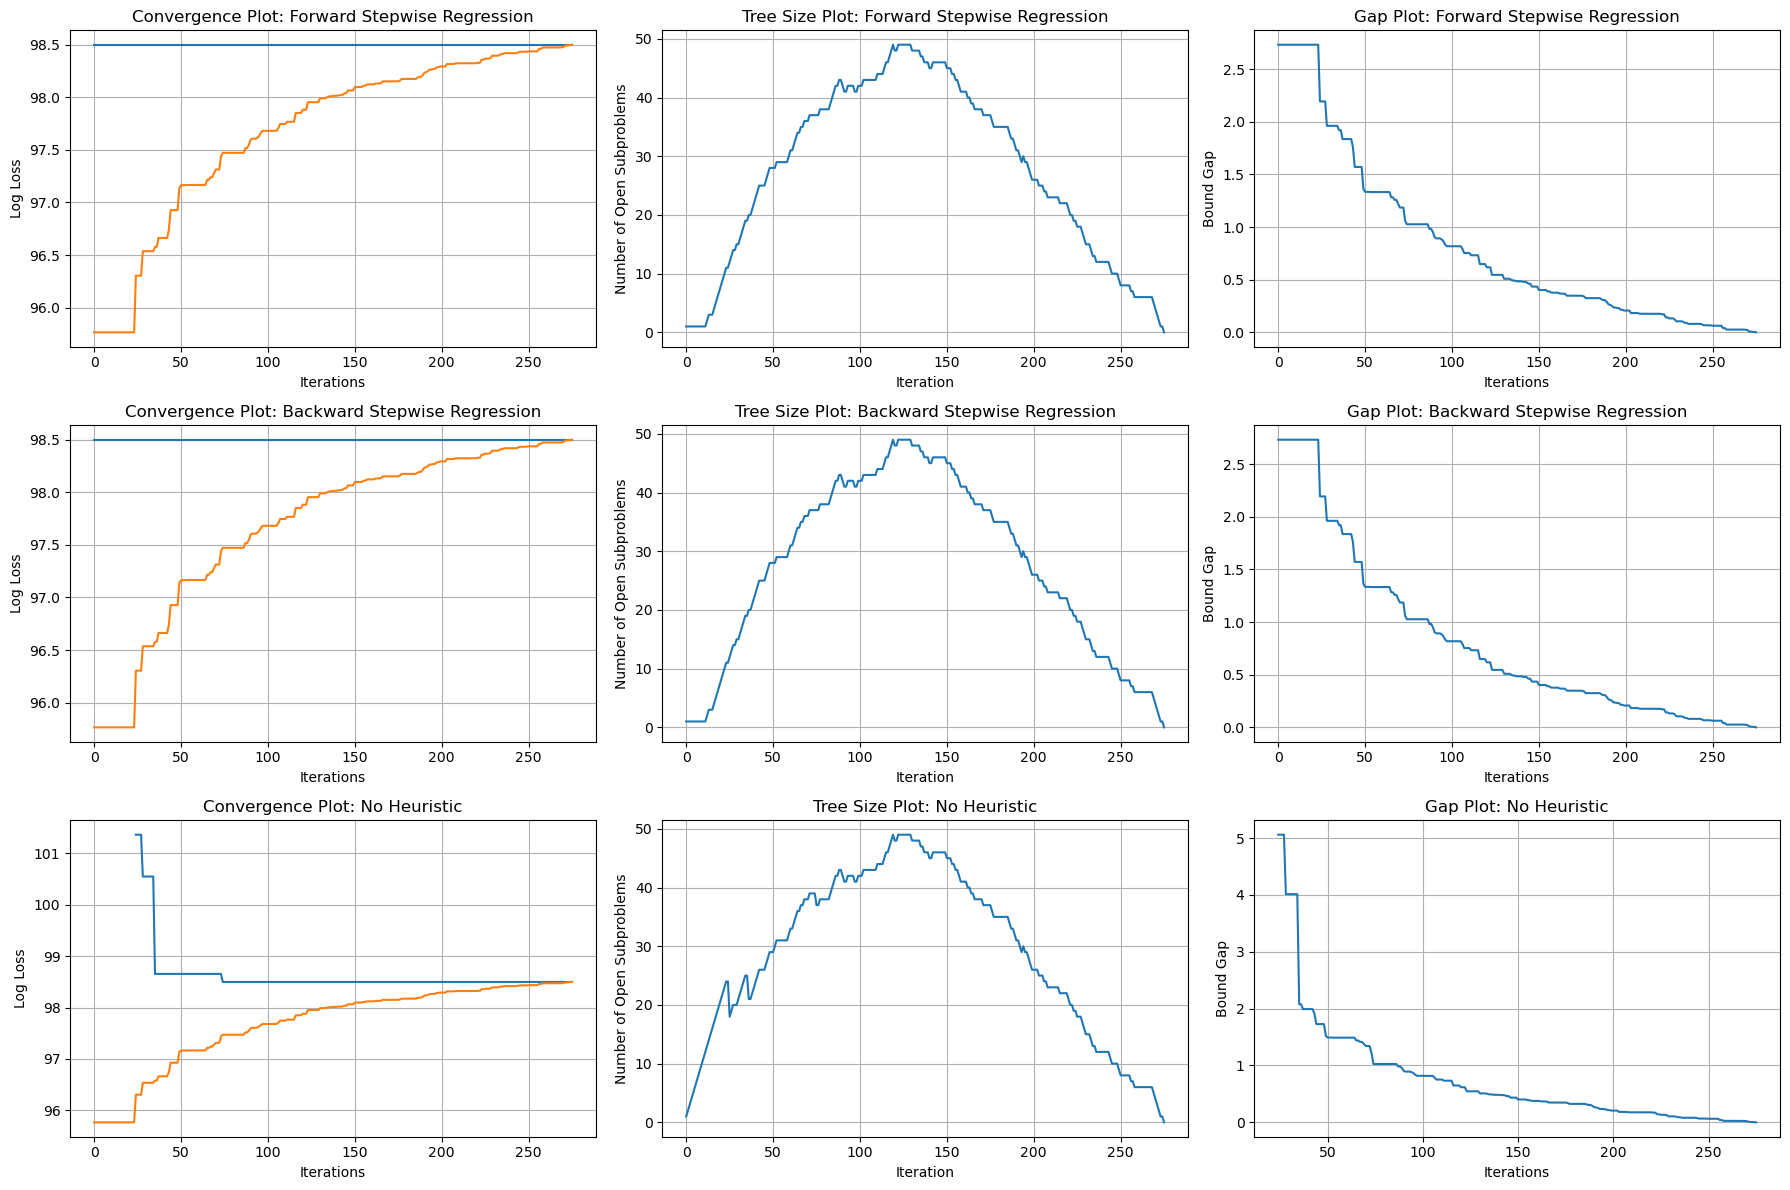

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

heuristics = ("Forward Stepwise Regression", "Backward Stepwise Regression", "No Heuristic")

fig, axes = plt.subplots(nrows=len(heuristics), ncols=3, figsize=(18, 4*len(heuristics))) 


for i, heuristic in enumerate(heuristics):
    ax1 = axes[i, 0]
    ax2 = axes[i, 1]
    ax3 = axes[i, 2]

    df = pd.read_csv(f"test_data/test_ionosphere_sklearn_sklearn_mostFractional_{heuristic}_24.csv")

    # Plot 1
    ax1.plot(df['iteration'], df['UB'], label='Upper Bound')
    ax1.plot(df['iteration'], df['LB'], label='Lower Bound')
    ax1.set_title(f'Convergence Plot: {heuristic}')
    ax1.set_xlabel('Iterations')
    ax1.set_ylabel('Log Loss')
    ax1.grid(True)

    # Plot 2
    ax2.plot(df['iteration'], df['num_subproblems'])#, label='Number of Open Subproblems')
    ax2.set_title(f'Tree Size Plot: {heuristic}')
    ax2.set_xlabel('Iteration')
    ax2.set_ylabel('Number of Open Subproblems')
    ax2.grid(True)

    # Plot 3
    ax3.plot(df['iteration'], df['UB'] - df['LB'], label='Gap')
    ax3.set_title(f'Gap Plot: {heuristic}')
    ax3.set_xlabel('Iterations')
    ax3.set_ylabel('Bound Gap')
    ax3.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

# Testing Variable Selection Heuristics

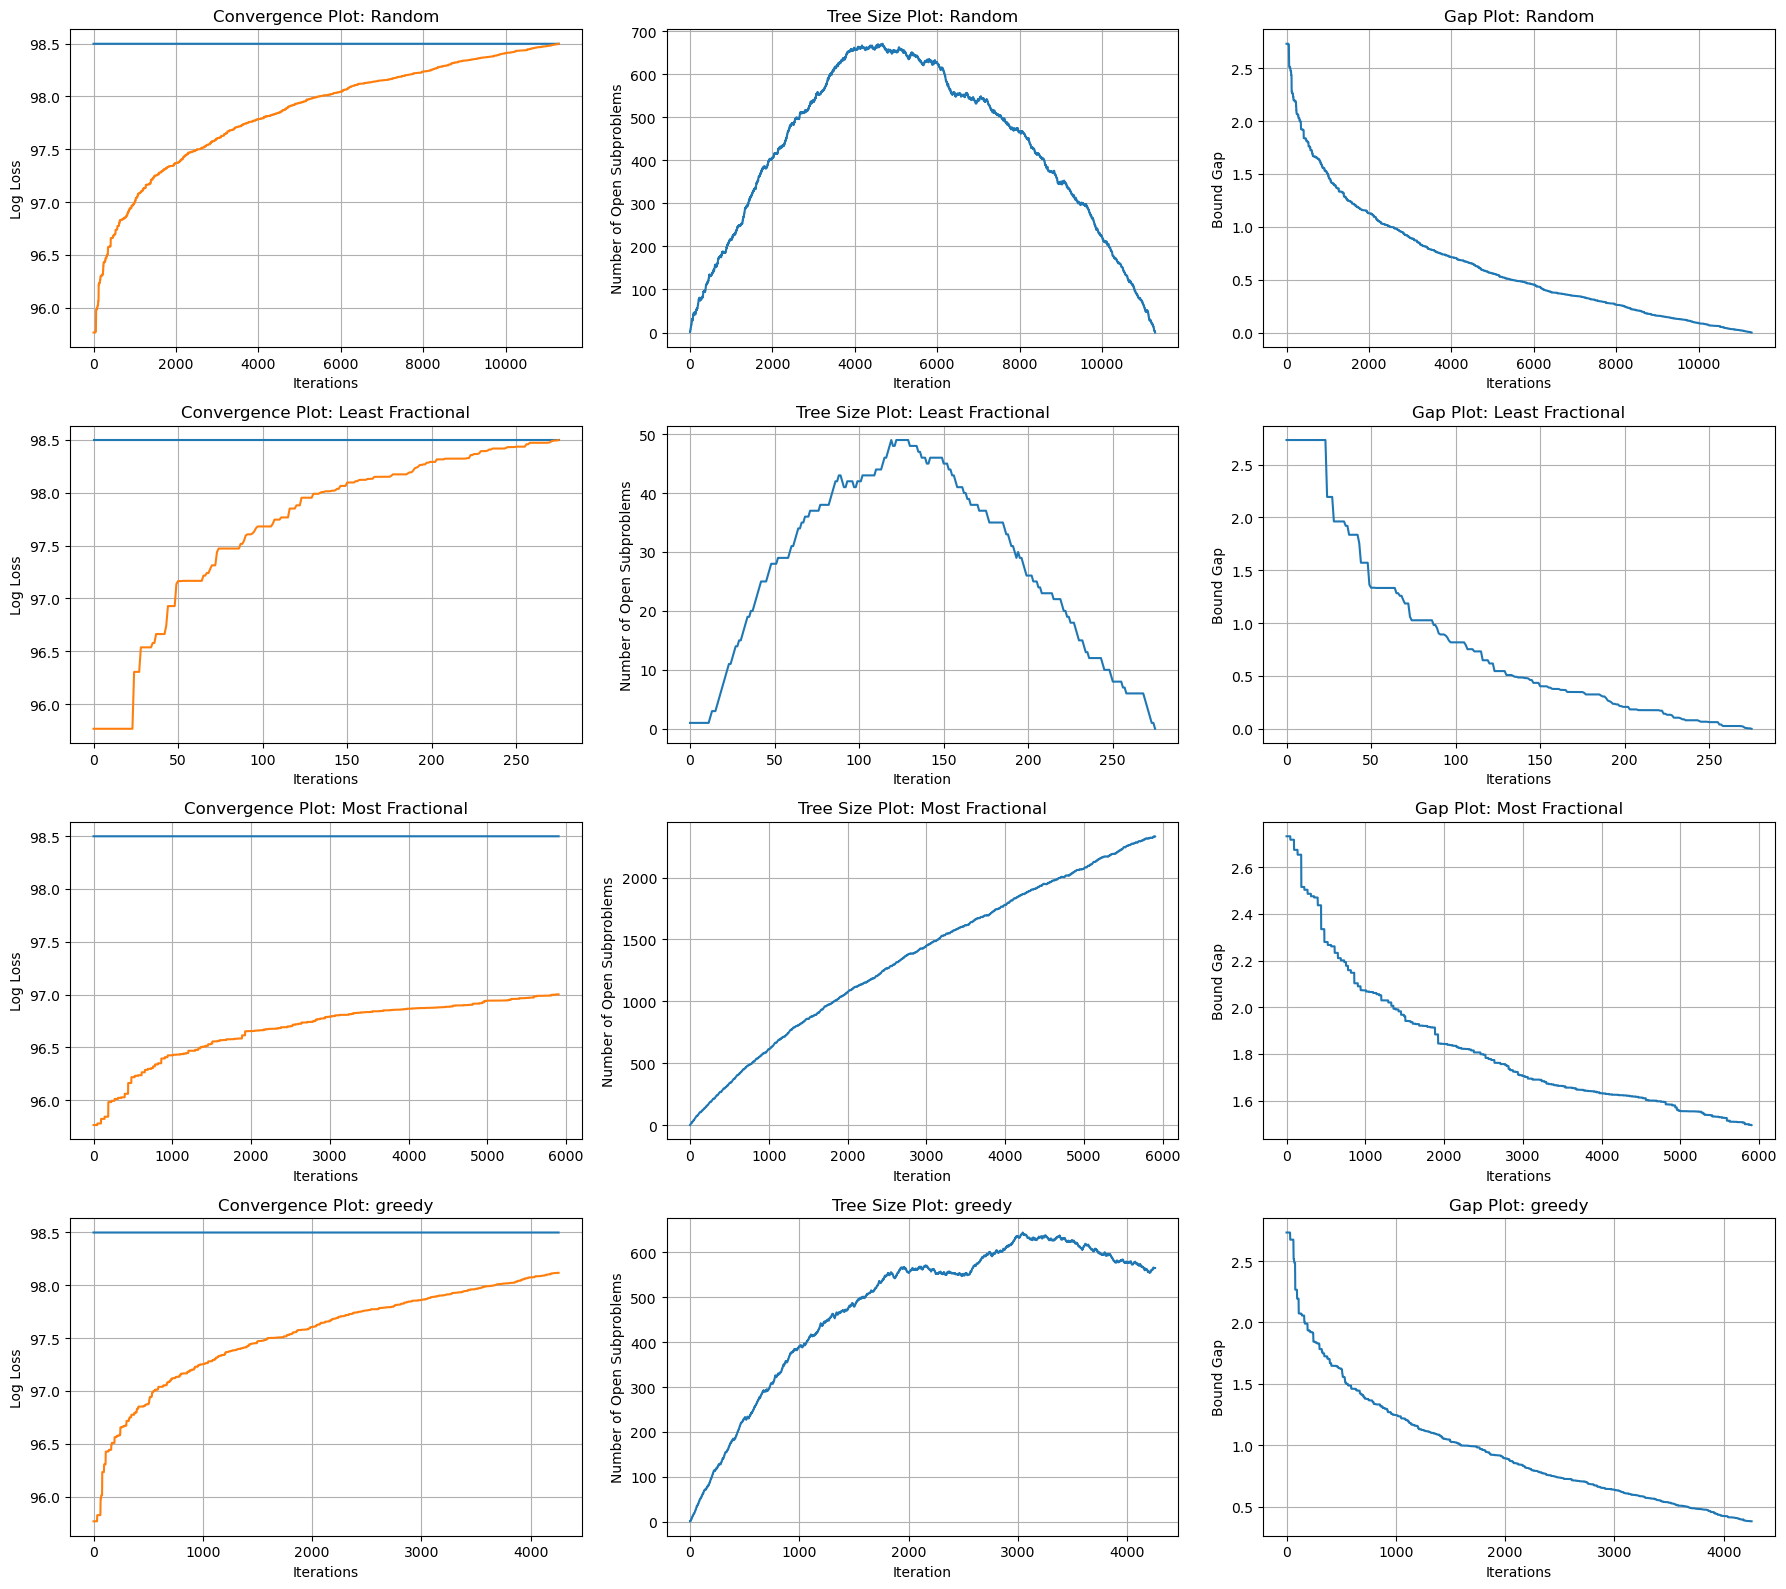

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Example: replace with your actual filenames
heuristics = ("Random",
    "Least Fractional",
    "Most Fractional",
    "greedy")

fig, axes = plt.subplots(nrows=len(heuristics), ncols=3, figsize=(18, 4*len(heuristics))) 


for i, heuristic in enumerate(heuristics):
    ax1 = axes[i, 0]
    ax2 = axes[i, 1]
    ax3 = axes[i, 2]

    df = pd.read_csv(f"test_data/test_ionosphere_sklearn_sklearn_{heuristic}_backwardSelection_24.csv")

    # Plot 1
    ax1.plot(df['iteration'], df['UB'], label='Upper Bound')
    ax1.plot(df['iteration'], df['LB'], label='Lower Bound')
    ax1.set_title(f'Convergence Plot: {heuristic}')
    ax1.set_xlabel('Iterations')
    ax1.set_ylabel('Log Loss')
    ax1.grid(True)

    # Plot 2
    ax2.plot(df['iteration'], df['num_subproblems'])#, label='Number of Open Subproblems')
    ax2.set_title(f'Tree Size Plot: {heuristic}')
    ax2.set_xlabel('Iteration')
    ax2.set_ylabel('Number of Open Subproblems')
    ax2.grid(True)

    # Plot 3
    ax3.plot(df['iteration'], df['UB'] - df['LB'], label='Gap')
    ax3.set_title(f'Gap Plot: {heuristic}')
    ax3.set_xlabel('Iterations')
    ax3.set_ylabel('Bound Gap')
    ax3.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

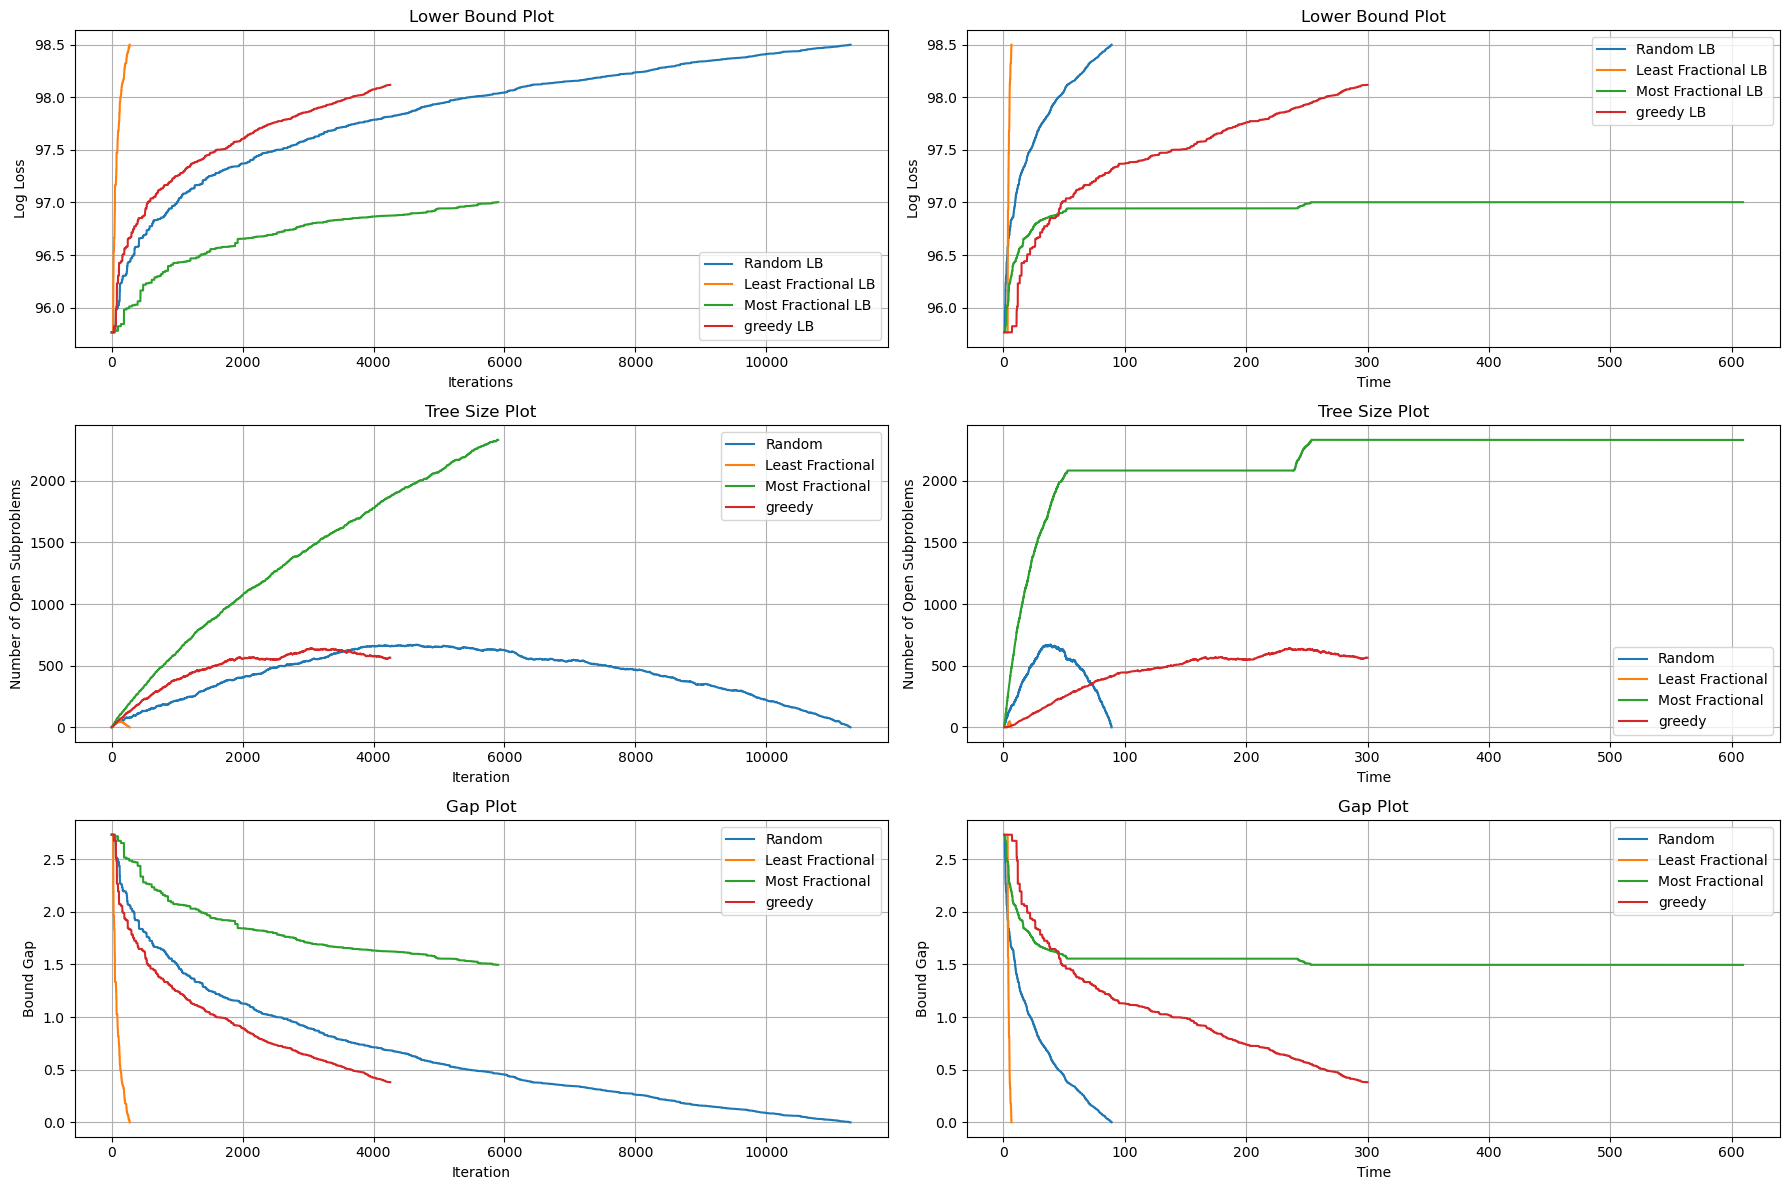

In [16]:
# Condensed
import pandas as pd
import matplotlib.pyplot as plt

heuristics = ("Random",
    "Least Fractional",
    "Most Fractional",
    "greedy")

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 12)) 


for i, heuristic in enumerate(heuristics):
    ax1 = axes[0, 0]
    ax4 = axes[0, 1]
    ax2 = axes[1, 0]
    ax5 = axes[1, 1]
    ax3 = axes[2, 0]
    ax6 = axes[2, 1]

    df = pd.read_csv(f"test_data/test_ionosphere_sklearn_sklearn_{heuristic}_backwardSelection_24.csv")

    # Plot 1
    # ax1.plot(df['iteration'], df['UB'], label=f'{heuristic} UB')
    ax1.plot(df['iteration'], df['LB'], label=f'{heuristic} LB')
    ax1.set_title(f'Lower Bound Plot')
    ax1.set_xlabel('Iterations')
    ax1.set_ylabel('Log Loss')
    ax1.legend()
    ax1.grid(True)

    # ax4.plot(df['time'], df['UB'], label=f'{heuristic} UB')
    ax4.plot(df['time'], df['LB'], label=f'{heuristic} LB')
    ax4.set_title(f'Lower Bound Plot')
    ax4.set_xlabel('Time')
    ax4.set_ylabel('Log Loss')
    ax4.legend()
    ax4.grid(True)

    # Plot 2
    ax2.plot(df['iteration'], df['num_subproblems'], label=heuristic)#, label='Number of Open Subproblems')
    ax2.set_title(f'Tree Size Plot')
    ax2.set_xlabel('Iteration')
    ax2.set_ylabel('Number of Open Subproblems')
    ax2.legend()
    ax2.grid(True)

    ax5.plot(df['time'], df['num_subproblems'], label=heuristic)#, label='Number of Open Subproblems')
    ax5.set_title(f'Tree Size Plot')
    ax5.set_xlabel('Time')
    ax5.set_ylabel('Number of Open Subproblems')
    ax5.legend()
    ax5.grid(True)

    # Plot 3
    ax3.plot(df['iteration'], df['UB'] - df['LB'], label=heuristic)
    ax3.set_title(f'Gap Plot')
    ax3.set_xlabel('Iteration')
    ax3.set_ylabel('Bound Gap')
    ax3.legend()
    ax3.grid(True) 

    ax6.plot(df['time'], df['UB'] - df['LB'], label=heuristic)
    ax6.set_title(f'Gap Plot')
    ax6.set_xlabel('Time')
    ax6.set_ylabel('Bound Gap')
    ax6.legend()
    ax6.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()